In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

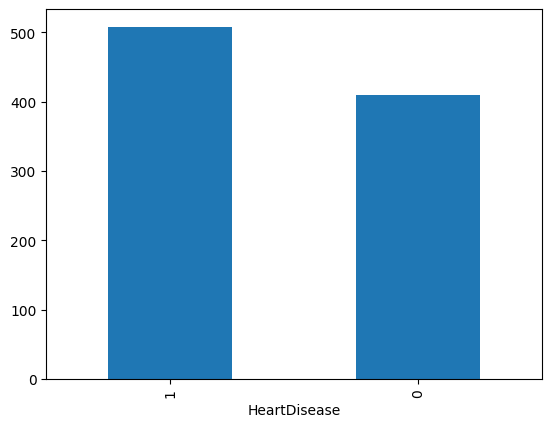

In [9]:
df['HeartDisease'].value_counts().plot(kind='bar')

In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
numeric_columns=['Age','RestingBP','Cholesterol','MaxHR']

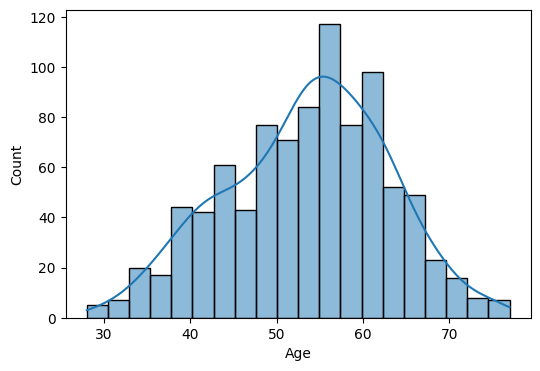

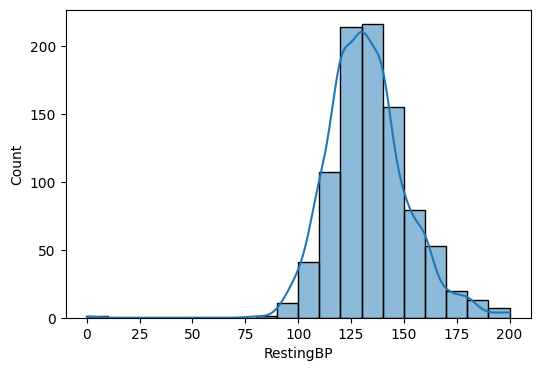

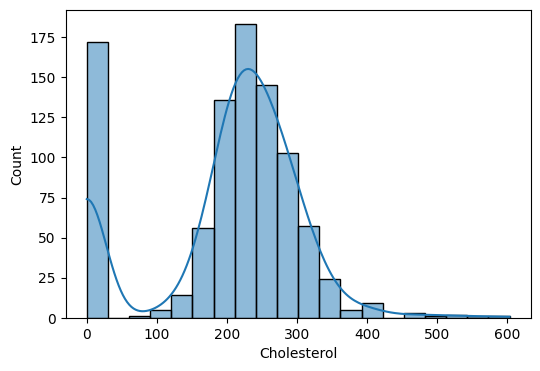

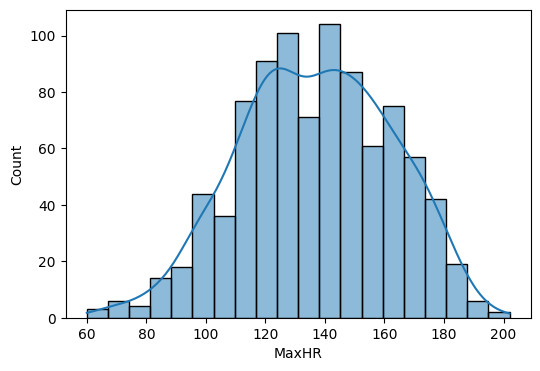

In [12]:
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True,bins=20)

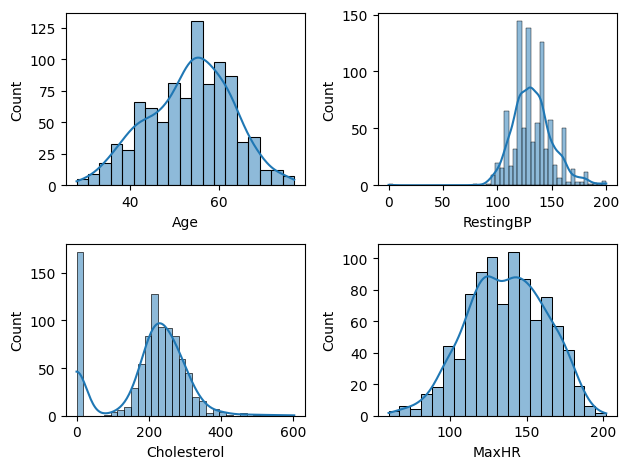

In [13]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)
plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)
plt.tight_layout()

In [14]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [15]:
ch_mean=df.loc[df['Cholesterol']!=0,'Cholesterol'].mean()

In [16]:
df['Cholesterol']=df['Cholesterol'].replace(0,ch_mean)
df['Cholesterol']=df['Cholesterol'].round(2)

In [17]:
resting_bp_mean=df.loc[df['RestingBP']!=0,'RestingBP'].mean()
df['RestingBP']=df['RestingBP'].replace(0,resting_bp_mean)
df['RestingBP'] = df['RestingBP'].round(2)

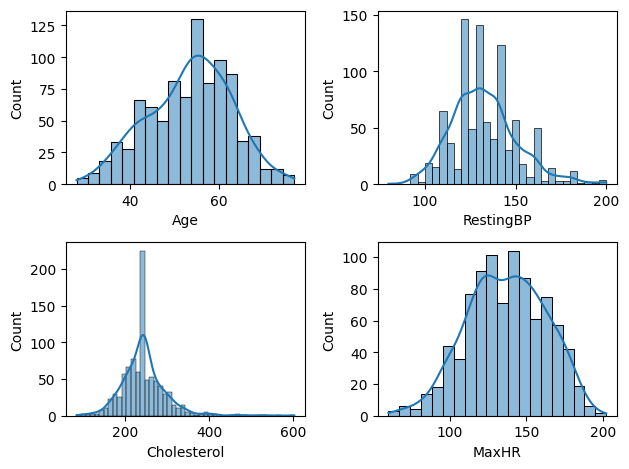

In [18]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde = True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)
plt.tight_layout()

In [19]:
!pip install sheryanalysis==0.1.0



In [20]:
import sheryanalysis as sh
sh.analyze(df)


🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (918, 12)
🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

✅ No null values found

🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


{'shape': (918, 12),
 'columns': ['Age',
  'Sex',
  'ChestPainType',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'RestingECG',
  'MaxHR',
  'ExerciseAngina',
  'Oldpeak',
  'ST_Slope',
  'HeartDisease'],
 'dtypes': {'Age': dtype('int64'),
  'Sex': dtype('O'),
  'ChestPainType': dtype('O'),
  'RestingBP': dtype('float64'),
  'Cholesterol': dtype('float64'),
  'FastingBS': dtype('int64'),
  'RestingECG': dtype('O'),
  'MaxHR': dtype('int64'),
  'ExerciseAngina': dtype('O'),
  'Oldpeak': dtype('float64'),
  'ST_Slope': dtype('O'),
  'HeartDisease': dtype('int64')},
 'null_counts': {'Age': 0,
  'Sex': 0,
  'ChestPainType': 0,
  'RestingBP': 0,
  'Cholesterol': 0,
  'FastingBS': 0,
  'RestingECG': 0,
  'MaxHR': 0,
  'ExerciseAngina': 0,
  'Oldpeak': 0,
  'ST_Slope': 0,
  'HeartDisease': 0},
 'total_rows': 918,
 'column_types': {'categorical': ['Sex',
   'ChestPainType',
   'FastingBS',
   'RestingECG',
   'ExerciseAngina',
   'ST_Slope',
   'HeartDisease'],
  'numerical': ['Age', 'Rest

<Axes: xlabel='Sex', ylabel='count'>

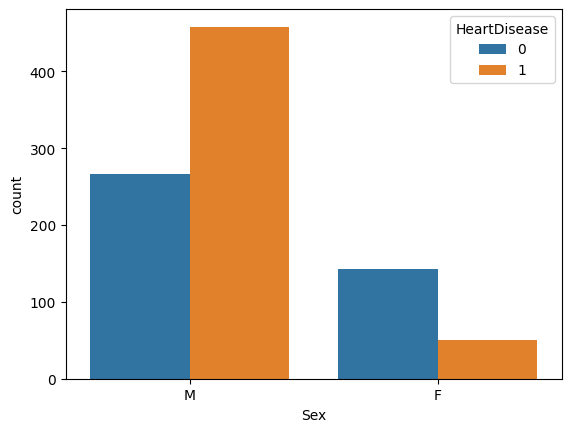

In [21]:
sns.countplot(x=df['Sex'],hue=df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

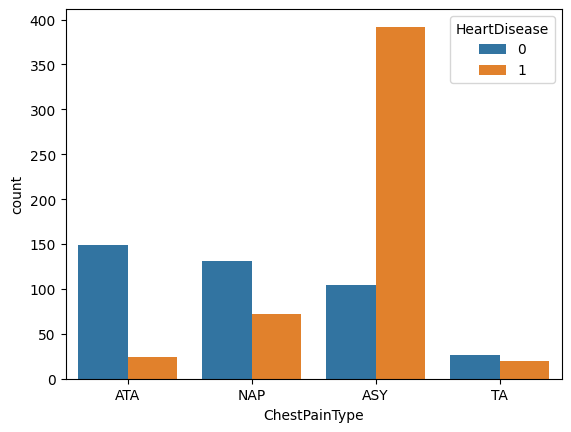

In [22]:
sns.countplot(x = df['ChestPainType'],hue = df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

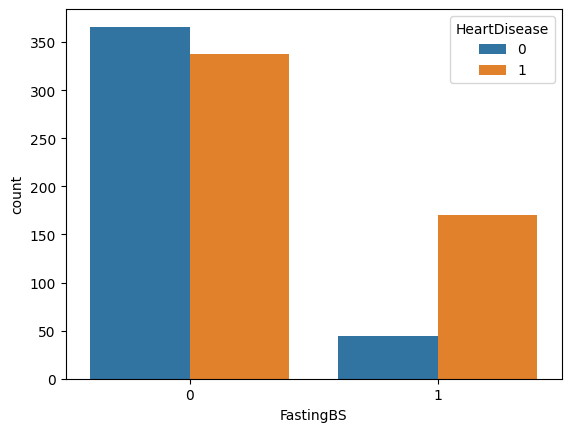

In [23]:
sns.countplot(x = df['FastingBS'],hue = df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

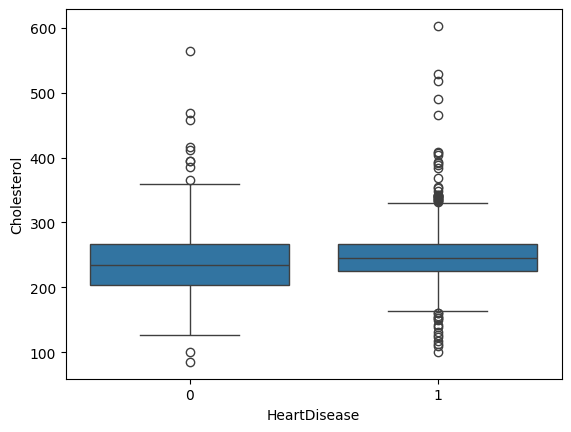

In [24]:
sns.boxplot(x='HeartDisease',y='Cholesterol',data=df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

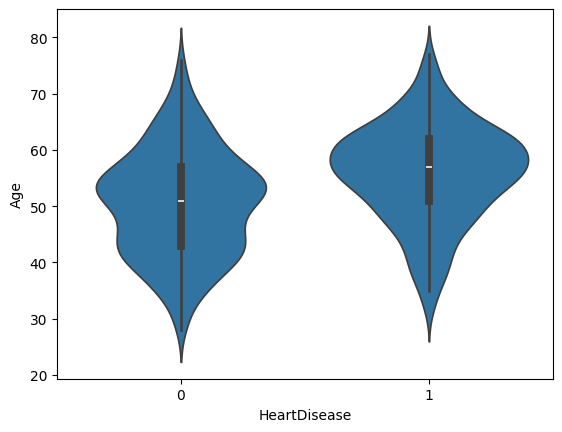

In [25]:
sns.violinplot(x='HeartDisease', y='Age', data=df)

<Axes: >

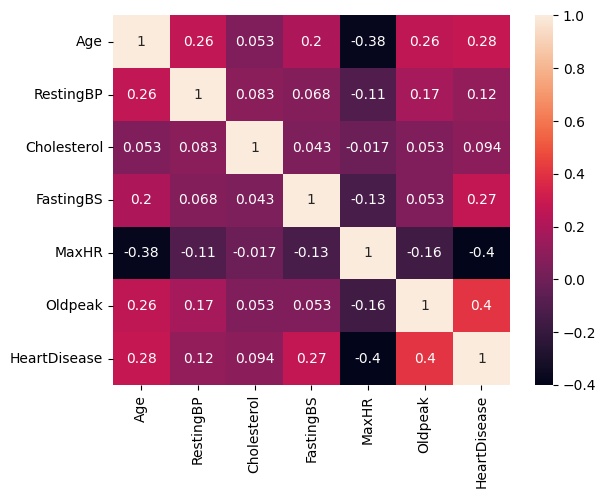

In [26]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [27]:
df_encode=pd.get_dummies(df,drop_first=True)

In [28]:
df_encode=df_encode.astype(int)

In [29]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df_encode[numerical_cols]=scaler.fit_transform(df_encode[numerical_cols])
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1


In [30]:
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


Feature Engineering and Extraction

In [31]:
df['Sex']=df['Sex'].map({'M':0,'F':1})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N':0, 'Y':1})

In [32]:
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140.0,289.0,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160.0,180.0,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130.0,283.0,0,ST,98,0,0.0,Up,0
3,48,1,ASY,138.0,214.0,0,Normal,108,1,1.5,Flat,1
4,54,0,NAP,150.0,195.0,0,Normal,122,0,0.0,Up,0


In [33]:
df=pd.get_dummies(df,columns=['ChestPainType', 'RestingECG', 'ST_Slope'],drop_first=True)

In [34]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,0,140.0,289.0,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,1,160.0,180.0,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,0,130.0,283.0,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,1,138.0,214.0,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,0,150.0,195.0,0,122,0,0.0,0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110.0,264.0,0,132,0,1.2,1,False,False,True,True,False,True,False
914,68,0,144.0,193.0,1,141,0,3.4,1,False,False,False,True,False,True,False
915,57,0,130.0,131.0,0,115,1,1.2,1,False,False,False,True,False,True,False
916,57,1,130.0,236.0,0,174,0,0.0,1,True,False,False,False,False,True,False


In [35]:
df['Age_group']=pd.cut(df['Age'],bins=[0,30,45,60,100],labels=['Young','Adult','Senior','Old'])
df = pd.get_dummies(df, columns=['Age_group'], drop_first=True)

In [36]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,Age_group_Adult,Age_group_Senior,Age_group_Old
0,40,0,140.0,289.0,0,172,0,0.0,0,True,False,False,True,False,False,True,True,False,False
1,49,1,160.0,180.0,0,156,0,1.0,1,False,True,False,True,False,True,False,False,True,False
2,37,0,130.0,283.0,0,98,0,0.0,0,True,False,False,False,True,False,True,True,False,False
3,48,1,138.0,214.0,0,108,1,1.5,1,False,False,False,True,False,True,False,False,True,False
4,54,0,150.0,195.0,0,122,0,0.0,0,False,True,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110.0,264.0,0,132,0,1.2,1,False,False,True,True,False,True,False,True,False,False
914,68,0,144.0,193.0,1,141,0,3.4,1,False,False,False,True,False,True,False,False,False,True
915,57,0,130.0,131.0,0,115,1,1.2,1,False,False,False,True,False,True,False,False,True,False
916,57,1,130.0,236.0,0,174,0,0.0,1,True,False,False,False,False,True,False,False,True,False


In [37]:
df['BP_category']=pd.cut(df['RestingBP'],bins=[0,120,129,139,200],labels=['Normal','Elevated','Stage1','Stage2'])
df = pd.get_dummies(df, columns=['BP_category'], drop_first=True)

In [38]:
df['Cholesterol'].max()

np.float64(603.0)

In [39]:
df['Cholesterol_cat'] = pd.cut(df['Cholesterol'], bins=[0,200,239,float('inf')],
                               labels=['Desirable','Borderline','High'])
df = pd.get_dummies(df, columns=['Cholesterol_cat'], drop_first=True)


In [40]:
df['MaxHR_pct'] = df['MaxHR'] / (220 - df['Age'])

In [41]:
df_encode.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [46]:
X=df_encode.drop('HeartDisease',axis=1)

In [47]:
y=df_encode['HeartDisease']

In [48]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.253622,0.365619,0,-0.188999,0.282891,1,0,0,1,1,0,0,1,0
914,1.536902,0.637353,-0.966725,1,0.164684,2.303858,1,0,0,0,1,0,0,1,0
915,0.370100,-0.141284,-2.130180,0,-0.857069,0.282891,1,0,0,0,1,0,1,1,0
916,0.370100,-0.141284,-0.159813,0,1.461525,-0.727592,0,1,0,0,0,0,0,1,0


In [49]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
scaler=StandardScaler()

In [53]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [68]:
models={
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Naive Bayes":GaussianNB(),
    "Decision Tree":DecisionTreeClassifier(),
    "SVM (RBF Kernel)":SVC(probability=True)
}

In [62]:
results=[]

In [69]:
for name, model1 in models.items():
    model1.fit(X_train_scaled,y_train)
    y_pred=model1.predict(X_test_scaled)
    acc=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    results.append({
        'Model':name,
        'Accuracy':round(acc,4),
        'F1 Score':round(f1,4)
    })

In [64]:
results

[{'Model': 'Logistic Regression', 'Accuracy': 0.8696, 'F1 Score': 0.8857},
 {'Model': 'KNN', 'Accuracy': 0.8641, 'F1 Score': 0.8815},
 {'Model': 'Naive Bayes', 'Accuracy': 0.8533, 'F1 Score': 0.8683},
 {'Model': 'Decision Tree', 'Accuracy': 0.7717, 'F1 Score': 0.7961},
 {'Model': 'SVM (RBF Kernel)', 'Accuracy': 0.8478, 'F1 Score': 0.8679}]

In [70]:
import joblib
joblib.dump(models['KNN'],'KNN_heart.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')

['columns.pkl']

to convert model save convert it into bitstream and save it as a file